# Training and Validation losses

In [20]:
# Reloads modules automatically before executing code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
# Imports
import os
from DL_vs_HateSpeech.plots.plot_loss import plot_losses_from_path
from DL_vs_HateSpeech.models.model_v0 import ModelV0
device = "cpu"


## Model v0

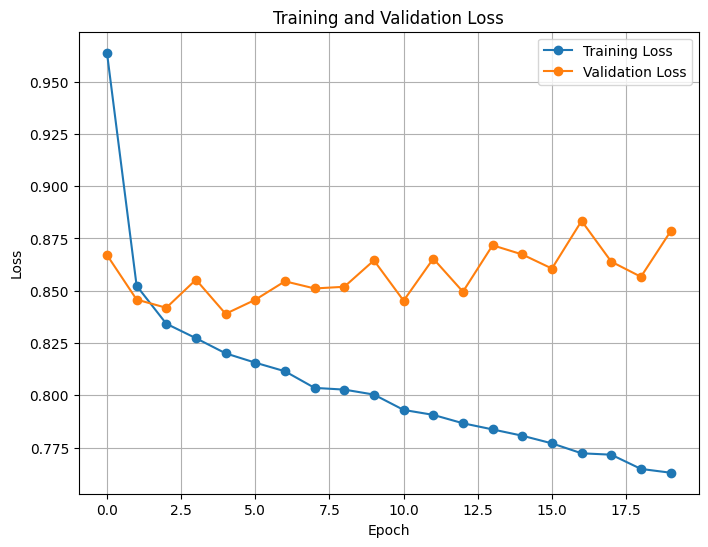

In [22]:
path = "./models/model_checkpoints//model_0"
# See the files in the path
plot_losses_from_path(path)

In [ ]:
model_0 = ModelV0().to(device)
model_0.load(path, device=device)

